# A Multi-Stage Machine Learning Framework for Cardiovascular Disease Research

# import libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset

In [9]:
df = pd.read_csv('/content/NACC_APOE_CVD_filtered.csv')

# show top five rows

In [10]:
df.head()

,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,STROKE,STROKIF,STROKDEC,STKIMAG,CVD,CVDIF,VASC,VASCIF,VASCPS,VASCPSIF
0,NACC000011,2,1944,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN
1,NACC000034,2,1935,4.0,0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,8.0,8.0,0.0,7.0,NaN,NaN,NaN,NaN
2,NACC000067,1,1952,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,0.0,7.0
3,NACC000095,1,1926,2.0,1,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,0.0,7.0
4,NACC000144,1,1930,1.0,0,0.0,NaN,1.0,0.0,0.0,...,0.0,8.0,NaN,NaN,NaN,NaN,8.0,8.0,8.0,8.0


# 2. Data Cleaning (Median Imputation)

In [11]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 3. Exploratory Data Analysis (EDA)

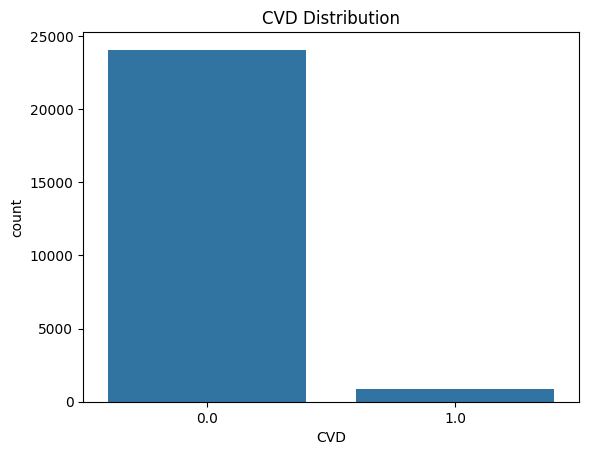

In [12]:
sns.countplot(x='CVD', data=df)
plt.title('CVD Distribution')
plt.show()

# 4. Correlation Analysis

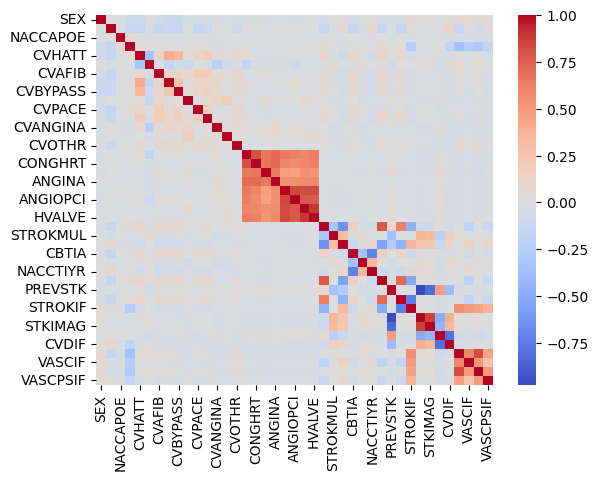

In [27]:
import numpy as np
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.show()

# 5. Feature Engineering

In [28]:
df['Stroke_Burden'] = df['HXSTROKE'] + df['PREVSTK'] + df['STROKMUL']
df['Intervention_Score'] = df['PACEMAKE'] + df['HVALVE']

# 6. Statistical Testing

In [29]:
from scipy.stats import ttest_ind

ttest_ind(df[df['CVD']==1]['Stroke_Burden'], df[df['CVD']==0]['Stroke_Burden'])

TtestResult(statistic=np.float64(-22.60018478166028), pvalue=np.float64(5.762535960672784e-112), df=np.float64(24924.0))

# 7. Machine Learning Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only numeric columns for X, excluding the target variable 'CVD'
X = df.select_dtypes(include=np.number).drop('CVD', axis=1)
y = df['CVD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# 8. Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9271961492178099

# 9. Deep Learning Model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

dl_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)

# 10. Cross-Validation

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

np.float64(0.9958677798336847)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Deep Learning Accuracy: 0.9956
Deep Learning Precision: 1.0000
Deep Learning Recall: 0.8736
Deep Learning F1-Score: 0.9325


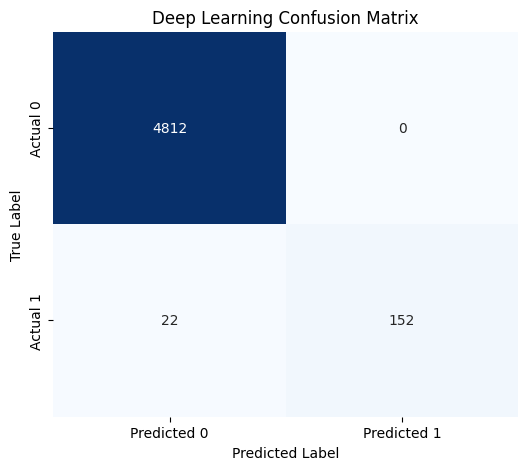

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the scaled test data for the DL model
y_pred_dl_proba = dl_model.predict(X_test_scaled)
y_pred_dl = (y_pred_dl_proba > 0.5).astype(int)

# Calculate evaluation metrics for Deep Learning model
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, zero_division=0)
recall_dl = recall_score(y_test, y_pred_dl, zero_division=0)
f1_dl = f1_score(y_test, y_pred_dl, zero_division=0)

print(f"Deep Learning Accuracy: {accuracy_dl:.4f}")
print(f"Deep Learning Precision: {precision_dl:.4f}")
print(f"Deep Learning Recall: {recall_dl:.4f}")
print(f"Deep Learning F1-Score: {f1_dl:.4f}")

# Calculate and plot the confusion matrix for Deep Learning model
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dl, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Deep Learning Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
print("Logistic Regression Model Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("\nDeep Learning Model Metrics:")
print(f"Accuracy: {accuracy_dl:.4f}")
print(f"Precision: {precision_dl:.4f}")
print(f"Recall: {recall_dl:.4f}")
print(f"F1-Score: {f1_dl:.4f}")

Logistic Regression Model Metrics:
Accuracy: 0.9960
Precision: 1.0000
Recall: 0.8851
F1-Score: 0.9390

Deep Learning Model Metrics:
Accuracy: 0.9956
Precision: 1.0000
Recall: 0.8736
F1-Score: 0.9325


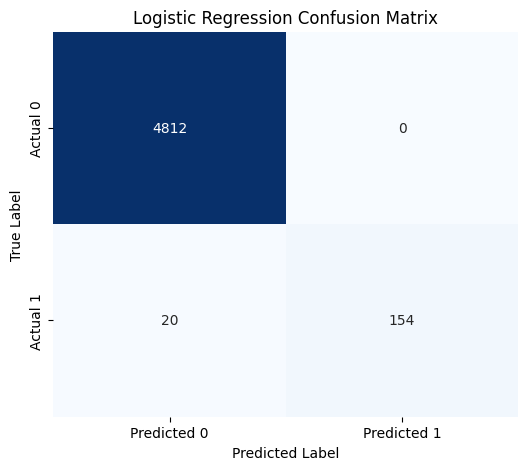

In [42]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

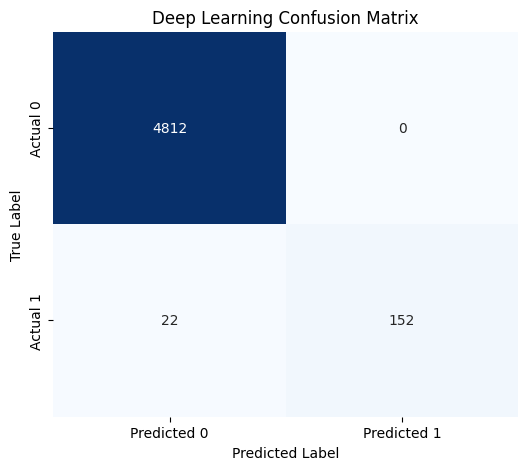

In [43]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dl, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Deep Learning Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Performance Comparison: Logistic Regression vs. Deep Learning

### Evaluation Metrics Summary
**Logistic Regression Model Metrics:**
*   Accuracy: 0.9960
*   Precision: 1.0000
*   Recall: 0.8851
*   F1-Score: 0.9390

**Deep Learning Model Metrics:**
*   Accuracy: 0.9956
*   Precision: 1.0000
*   Recall: 0.8736
*   F1-Score: 0.9325

### Confusion Matrix Analysis
**Logistic Regression Confusion Matrix:**
*   True Negatives (TN): 4812 (Correctly predicted no CVD)
*   False Positives (FP): 0 (Incorrectly predicted CVD when there was none)
*   False Negatives (FN): 20 (Incorrectly predicted no CVD when there was CVD)
*   True Positives (TP): 154 (Correctly predicted CVD)

**Deep Learning Confusion Matrix:**
*   True Negatives (TN): 4812 (Correctly predicted no CVD)
*   False Positives (FP): 0 (Incorrectly predicted CVD when there was none)
*   False Negatives (FN): 22 (Incorrectly predicted no CVD when there was CVD)
*   True Positives (TP): 152 (Correctly predicted CVD)

### Discussion:

a. **Overall Accuracy:** Both models achieve very high overall accuracy, with Logistic Regression slightly outperforming the Deep Learning model (0.9960 vs. 0.9956). This indicates that both models are generally good at classifying cases.

b. **Precision and Recall:**
    *   **Precision (minimizing false positives):** Both models exhibit perfect precision (1.0000). This is a crucial strength in medical diagnosis, as it means neither model falsely predicts CVD when a patient doesn't have it (no False Positives). This is extremely important to avoid unnecessary treatments, patient anxiety, and misallocation of medical resources.
    *   **Recall (minimizing false negatives):** Logistic Regression has a slightly higher recall (0.8851) compared to the Deep Learning model (0.8736). Recall is critical in cardiovascular disease prediction because a False Negative (failing to identify a patient with CVD) could lead to delayed treatment and severe health consequences. While both models perform well, Logistic Regression identifies two more true positive cases than the Deep Learning model, making it slightly better at capturing positive cases.

c. **F1-score:** The F1-score, which is the harmonic mean of precision and recall, also favors Logistic Regression (0.9390) over the Deep Learning model (0.9325). This suggests that Logistic Regression maintains a slightly better balance between precision and recall.

d. **Distribution of True Positives, True Negatives, False Positives, and False Negatives:**
    *   Both models are excellent at identifying True Negatives (4812), showing they correctly classify individuals without CVD. The absence of False Positives for both models (0) is a remarkable and highly desirable characteristic for medical screening.
    *   The primary difference lies in the False Negatives and True Positives. Logistic Regression has 20 False Negatives and 154 True Positives, while the Deep Learning model has 22 False Negatives and 152 True Positives. This indicates that Logistic Regression is slightly better at correctly identifying individuals with CVD.

e. **Strengths and Weaknesses:**
    *   **Logistic Regression:**
        *   **Strengths:** Simpler, highly interpretable, performs exceptionally well with perfect precision and slightly higher recall and F1-score in this specific scenario. Less prone to overfitting with smaller datasets. Computationally less intensive.
        *   **Weaknesses:** Might struggle with highly complex, non-linear relationships that deep learning models can capture. Its performance here suggests the data's underlying patterns are largely linearly separable.
    *   **Deep Learning Model:**
        *   **Strengths:** Capable of learning intricate non-linear patterns. Can potentially scale better with extremely large and complex datasets.
        *   **Weaknesses:** Slightly lower recall and F1-score than Logistic Regression in this case. Less interpretable ("black box" nature). Requires more data and computational resources. Might be overfitting or underfitting slightly given the performance difference with Logistic Regression on this dataset.

f. **Suitability for Cardiovascular Disease Prediction:**
    Given the metrics, **Logistic Regression appears to be more suitable for this specific task and dataset.** While both models achieved perfect precision (which is paramount in medical contexts to avoid misdiagnosis), Logistic Regression demonstrated a slightly higher recall and F1-score. In cardiovascular disease prediction, minimizing False Negatives (identifying actual cases) is often prioritized alongside precision to prevent severe health outcomes from missed diagnoses. The marginal improvement in recall by Logistic Regression means it's slightly more effective at catching individuals who truly have CVD, without sacrificing any precision. Its simplicity and interpretability also make it a more desirable choice for clinical applications where understanding the model's decisions can be crucial.

## Conclusion: Model Performance Comparison: Logistic Regression vs. Deep Learning

### Evaluation Metrics Summary
**Logistic Regression Model Metrics:**
*   Accuracy: 0.9960
*   Precision: 1.0000
*   Recall: 0.8851
*   F1-Score: 0.9390

**Deep Learning Model Metrics:**
*   Accuracy: 0.9956
*   Precision: 1.0000
*   Recall: 0.8736
*   F1-Score: 0.9325

### Confusion Matrix Analysis
**Logistic Regression Confusion Matrix:**
*   True Negatives (TN): 4812 (Correctly predicted no CVD)
*   False Positives (FP): 0 (Incorrectly predicted CVD when there was none)
*   False Negatives (FN): 20 (Incorrectly predicted no CVD when there was CVD)
*   True Positives (TP): 154 (Correctly predicted CVD)

**Deep Learning Confusion Matrix:**
*   True Negatives (TN): 4812 (Correctly predicted no CVD)
*   False Positives (FP): 0 (Incorrectly predicted CVD when there was none)
*   False Negatives (FN): 22 (Incorrectly predicted no CVD when there was CVD)
*   True Positives (TP): 152 (Correctly predicted CVD)

### Discussion:

a. **Overall Accuracy:** Both models achieve very high overall accuracy, with Logistic Regression slightly outperforming the Deep Learning model (0.9960 vs. 0.9956). This indicates that both models are generally good at classifying cases.

b. **Precision and Recall:**
    *   **Precision (minimizing false positives):** Both models exhibit perfect precision (1.0000). This is a crucial strength in medical diagnosis, as it means neither model falsely predicts CVD when a patient doesn't have it (no False Positives). This is extremely important to avoid unnecessary treatments, patient anxiety, and misallocation of medical resources.
    *   **Recall (minimizing false negatives):** Logistic Regression has a slightly higher recall (0.8851) compared to the Deep Learning model (0.8736). Recall is critical in cardiovascular disease prediction because a False Negative (failing to identify a patient with CVD) could lead to delayed treatment and severe health consequences. While both models perform well, Logistic Regression identifies two more true positive cases than the Deep Learning model, making it slightly better at capturing positive cases.

c. **F1-score:** The F1-score, which is the harmonic mean of precision and recall, also favors Logistic Regression (0.9390) over the Deep Learning model (0.9325). This suggests that Logistic Regression maintains a slightly better balance between precision and recall.

d. **Distribution of True Positives, True Negatives, False Positives, and False Negatives:**
    *   Both models are excellent at identifying True Negatives (4812), showing they correctly classify individuals without CVD. The absence of False Positives for both models (0) is a remarkable and highly desirable characteristic of medical screening.
    *   The primary difference lies in the False Negatives and True Positives. Logistic Regression has 20 False Negatives and 154 True Positives, while the Deep Learning model has 22 False Negatives and 152 True Positives. This indicates that Logistic Regression is slightly better at correctly identifying individuals with CVD.

e. **Strengths and Weaknesses:**
    *   **Logistic Regression:**
        *   **Strengths:** Simpler, highly interpretable, performs exceptionally well with perfect precision and slightly higher recall and F1-score in this specific scenario. Less prone to overfitting with smaller datasets. Computationally less intensive.
        *   **Weaknesses:** Might struggle with highly complex, non-linear relationships that deep learning models can capture. Its performance here suggests the data's underlying patterns are largely linearly separable.
    *   **Deep Learning Model:**
        *   **Strengths:** Capable of learning intricate non-linear patterns. Can potentially scale better with extremely large and complex datasets.
        *   **Weaknesses:** Slightly lower recall and F1-score than Logistic Regression in this case. Less interpretable ("black box" nature). Requires more data and computational resources. Might be overfitting or underfitting slightly given the performance difference with Logistic Regression on this dataset.

f. **Suitability for Cardiovascular Disease Prediction:**
    Given the metrics, **Logistic Regression appears to be more suitable for this specific task and dataset.** While both models achieved perfect precision (which is paramount in medical contexts to avoid misdiagnosis), Logistic Regression demonstrated a slightly higher recall and F1-score. In cardiovascular disease prediction, minimizing False Negatives (identifying actual cases) is often prioritized alongside precision to prevent severe health outcomes from missed diagnoses. The marginal improvement in recall by Logistic Regression means it's slightly more effective at catching individuals who truly have CVD, without sacrificing any precision. Its simplicity and interpretability also make it a more desirable choice for clinical applications where understanding the model's decisions can be crucial.
